In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
df = pd.read_csv("churn_prediction.csv")

In [141]:
df.shape

(28382, 21)

In [142]:
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [143]:
df.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [144]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [145]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [146]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [147]:
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


In [148]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [149]:
df.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


Ttest_indResult(statistic=nan, pvalue=nan)

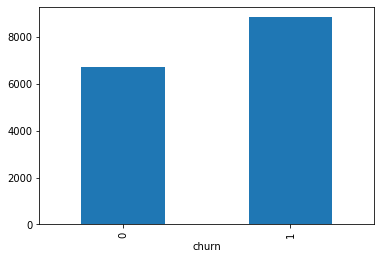

In [150]:
df.groupby('churn')['average_monthly_balance_prevQ2'].mean().plot.bar()
from scipy.stats import ttest_ind
will = df[df['churn'] == '1']
wont = df[df['churn'] == '0']
ttest_ind(will['average_monthly_balance_prevQ2'], wont['average_monthly_balance_prevQ2'], nan_policy='omit')

Ttest_indResult(statistic=nan, pvalue=nan)

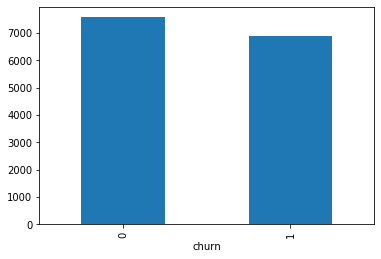

In [151]:
df.groupby('churn')['current_month_balance'].mean().plot.bar()
from scipy.stats import ttest_ind
will = df[df['churn'] == '1']
wont = df[df['churn'] == '0']
ttest_ind(will['current_month_balance'], wont['current_month_balance'], nan_policy='omit')

Ttest_indResult(statistic=nan, pvalue=nan)

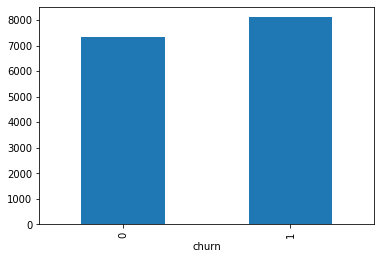

In [152]:
df.groupby('churn')['previous_month_end_balance'].mean().plot.bar()
from scipy.stats import ttest_ind
will = df[df['churn'] == '1']
wont = df[df['churn'] == '0']
ttest_ind(will['previous_month_end_balance'], wont['previous_month_end_balance'], nan_policy='omit')

Missing Value Treatment

In [153]:
df['dependents'].fillna(df['dependents'].mean(),inplace=True)
df['days_since_last_transaction'].fillna(df['days_since_last_transaction'].mean(),inplace=True)

In [154]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)
df['city'].fillna(df['city'].mode()[0],inplace=True)

In [155]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [156]:
temp = ['occupation','city']
#i will access all the variables in the temp dictionary
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in occupation ************
self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

************ Value Count in city ************
1020.0    4282
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64



In [157]:
dfe = pd.get_dummies(df)
dfe

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.000000,187.0,2,755,224.000000,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.000000,1020.0,2,3214,60.000000,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.000000,146.0,2,41,69.997814,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0.347236,1020.0,2,582,147.000000,2291.91,2291.91,...,2291.91,1669.79,1,0,1,0,0,0,1,0
4,6,2531,42,2.000000,1494.0,3,388,58.000000,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.000000,1020.0,2,1207,70.000000,1076.43,1076.43,...,1076.43,1076.43,0,1,0,0,0,0,0,1
28378,30298,4919,34,0.000000,1046.0,2,223,14.000000,3844.10,4069.21,...,3738.54,3690.32,0,1,0,0,0,0,1,0
28379,30299,297,47,0.000000,1096.0,2,588,0.000000,65511.97,61017.55,...,61078.50,57564.24,1,0,1,0,0,1,0,0
28380,30300,2585,50,3.000000,1219.0,3,274,69.997814,1625.55,1625.55,...,1625.55,1625.55,0,0,1,0,0,0,1,0


In [158]:
#separating dependent and independent variables
x = dfe.drop(['churn'],axis=1)
y = dfe['churn']
x.shape, y.shape

((28382, 25), (28382,))

In [159]:
#importing train test split function
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=101, stratify=y, test_size=0.25)

In [160]:
y_train.value_counts()

0    17341
1     3945
Name: churn, dtype: int64

In [161]:
y_valid.value_counts()

0    5781
1    1315
Name: churn, dtype: int64

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.000000,187.0,2,755,224.000000,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.000000,1020.0,2,3214,60.000000,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.000000,146.0,2,41,69.997814,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0.347236,1020.0,2,582,147.000000,2291.91,2291.91,...,2291.91,1669.79,1,0,1,0,0,0,1,0
4,6,2531,42,2.000000,1494.0,3,388,58.000000,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.000000,1020.0,2,1207,70.000000,1076.43,1076.43,...,1076.43,1076.43,0,1,0,0,0,0,0,1
28378,30298,4919,34,0.000000,1046.0,2,223,14.000000,3844.10,4069.21,...,3738.54,3690.32,0,1,0,0,0,0,1,0
28379,30299,297,47,0.000000,1096.0,2,588,0.000000,65511.97,61017.55,...,61078.50,57564.24,1,0,1,0,0,1,0,0
28380,30300,2585,50,3.000000,1219.0,3,274,69.997814,1625.55,1625.55,...,1625.55,1625.55,0,0,1,0,0,0,1,0


In [163]:
cols = x_train.columns
cols

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'gender_Female', 'gender_Male',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

In [164]:
train_x_scaled = scaler.fit_transform(x_train)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.034884,0.200645,0.325843,0.000000,0.930825,1.0,0.035767,0.073973,0.001458,0.001080,...,3.096294e-03,0.001129,0.001438,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.779670,0.584637,0.550562,0.000000,0.618932,0.5,0.049990,0.065753,0.001499,0.001159,...,1.024107e-03,0.001145,0.001716,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.130462,0.333045,0.674157,0.000000,0.348908,0.5,0.058356,0.008219,0.005616,0.005016,...,1.943963e-03,0.004989,0.005392,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.050462,0.106298,0.550562,0.000000,0.665049,1.0,0.419159,0.112329,0.001243,0.000878,...,6.165887e-04,0.000906,0.001257,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.022013,0.044972,1.000000,0.006678,0.665049,0.5,0.065467,0.134247,0.001507,0.001141,...,2.333527e-07,0.001172,0.001484,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [165]:
valid_x_scaled = scaler.transform(x_valid)
valid_x_scaled = pd.DataFrame(valid_x_scaled, columns=cols)
valid_x_scaled.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.022112,0.187672,0.370787,0.000000,0.802184,0.5,0.036603,0.052055,0.004636,0.004687,...,3.090170e-03,0.004308,0.004563,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.902904,0.017611,0.438202,0.006678,0.088592,1.0,0.594018,0.142466,0.000939,0.004818,...,7.071295e-08,0.004558,0.005182,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.185248,0.129491,0.674157,0.000000,0.956917,0.5,0.170257,0.191775,0.001015,0.001117,...,4.101351e-07,0.000983,0.001473,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.111320,0.077679,0.528090,0.000000,0.643811,0.5,0.212299,0.139726,0.001132,0.001963,...,9.609890e-06,0.001194,0.001957,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.477822,0.037188,0.887640,0.000000,0.348908,0.5,0.119431,0.019178,0.003216,0.002553,...,4.524269e-02,0.002811,0.004228,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [167]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
pred1=model1.predict(x_valid)
pred1[:10], model1.score(x_valid, y_valid)

(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8246899661781285)

In [168]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)
pred2=model2.predict(x_valid)
pred2[:10], model2.score(x_valid, y_valid)

(array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8416009019165727)

In [169]:
model3 = DecisionTreeClassifier(max_depth=7)
model3.fit(x_train,y_train)
pred3=model3.predict(x_valid)
pred3[:10], model3.score(x_valid, y_valid)

(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.8562570462232244)

In [170]:
# dfe = pd.DataFrame(columns=['M1', 'M2', 'M3', 'Actual'])
# dfe['M1'] = pred1
# dfe['M2'] = pred2
# dfe['M3'] = pred3
# dfe['Actual'] = np.array(valid_y)

In [171]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(y_valid)):7
final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [172]:
from sklearn.metrics import accuracy_score

In [173]:
accuracy_score(y_valid, final_pred)

ValueError: Found input variables with inconsistent numbers of samples: [7096, 1]

In [132]:
accuracy_score(y_valid, pred1), accuracy_score(y_valid, pred2), accuracy_score(y_valid, pred3)

(0.8246899661781285, 0.8416009019165727, 0.8561161217587373)